## Food-Recys-KoAlpaca-QLoRA-Model

- Apply QLoRA Fine-Tuning to the KoAlpaca-Polyglot-ko 5.8B model

- Reference :
  - https://colab.research.google.com/gist/Beomi/f163a6c04a869d18ee1a025b6d33e6d8/2023_05_26_bnb_4bit_koalpaca_v1_1a_on_polyglot_ko_12_8b.ipynb

### 기본 설치
- huggingface
  - bitsandbytes
  - transfomers
  - peft
  - accelerate
  - datasets

In [1]:
!nvidia-smi

Sat Dec  9 05:19:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00


### 데이터셋 로드

- Fine-Tuning을 위한 데이터셋
- self-instruct를 이용해 얻은 jsonl 파일 업로드(machine_generated_instructions.jsonl)

In [3]:
from datasets import load_dataset

# Dataset Load
data = load_dataset("kyeong6/food_recys")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [4]:
data

DatasetDict({
    train: Dataset({
        features: ['instruction', 'input', 'output'],
        num_rows: 10031
    })
})

### 데이터 매핑

- 데이터셋을 챗봇에 학습시키기 위한 매핑 작업

In [5]:
data = data.map(
    lambda x: {'text': f"### 질문: {x['instruction']}\n\n### 답변: {x['output']}<|endoftext|>" }
)

Map:   0%|          | 0/10031 [00:00<?, ? examples/s]

### 나누어진 모델 로드

- 파일을 작게 나누어 로드한 레포를 사용하면 RAM 오류없이 사용 가능

In [6]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

model_id = "beomi/KoAlpaca-Polyglot-5.8B"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id, quantization_config=bnb_config, device_map={"":0})

tokenizer_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/663 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/36.8k [00:00<?, ?B/s]

model-00001-of-00013.safetensors:   0%|          | 0.00/926M [00:00<?, ?B/s]

model-00002-of-00013.safetensors:   0%|          | 0.00/952M [00:00<?, ?B/s]

model-00003-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00004-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00005-of-00013.safetensors:   0%|          | 0.00/952M [00:00<?, ?B/s]

model-00006-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00007-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00008-of-00013.safetensors:   0%|          | 0.00/952M [00:00<?, ?B/s]

model-00009-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00010-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00011-of-00013.safetensors:   0%|          | 0.00/952M [00:00<?, ?B/s]

model-00012-of-00013.safetensors:   0%|          | 0.00/948M [00:00<?, ?B/s]

model-00013-of-00013.safetensors:   0%|          | 0.00/515M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/13 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

### 토큰화

- 텍스트 데이터만 토큰화 작업 수행

In [7]:
data = data.map(lambda samples: tokenizer(samples["text"]), batched=True)

Map:   0%|          | 0/10031 [00:00<?, ? examples/s]

In [8]:
data['train'][0]['text']

'### 질문: 일식 중에서도 유명한 음식은 무엇인가요?\n\n### 답변: 일식 중에서 유명한 음식으로는 초밥, 라멘, 돈까스, 우동 등이 있습니다.<|endoftext|>'

### PEFT 수행

- PEFT를 통해 prepare_model_for_kbit_training로 Low bit 학습을 준비

In [9]:
from peft import prepare_model_for_kbit_training

model.gradient_checkpointing_enable()
model = prepare_model_for_kbit_training(model)

- 기존 모델 중 학습가능한 파라미터의 수 출력하는 함수

In [10]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

### LoRA Parameter 정의

In [11]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules=["query_key_value"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

model = get_peft_model(model, config)
print_trainable_parameters(model)

trainable params: 3670016 || all params: 3070156800 || trainable%: 0.11953838970048696


### 학습

- optim 파라미터의 값인 paged_adamw_8bit 방식은 train loss를 0으로 만드는 오류 발생시켜 주석 처리

In [12]:
import transformers

# needed for gpt-neo-x tokenizer
tokenizer.pad_token = tokenizer.eos_token

trainer = transformers.Trainer(
    model=model,
    train_dataset=data["train"],
    args=transformers.TrainingArguments(
        per_device_train_batch_size=8,
        gradient_accumulation_steps=1,
        max_steps=6000,
        learning_rate=1e-4,
        fp16=True,
        logging_steps=10,
        logging_dir="./logs",
        output_dir="outputs",
        # optim="paged_adamw_8bit"
    ),
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False),
)
model.config.use_cache = False  # silence the warnings. Please re-enable for inference!
trainer.train()

You're using a PreTrainedTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss
10,3.120100
20,2.588900
30,2.256800
40,1.886100
50,1.771200
60,1.704700
70,1.675800
80,1.649200
90,1.567500
100,1.661600


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.

TrainOutput(global_step=6000, training_loss=1.348427028020223, metrics={'train_runtime': 19157.7494, 'train_samples_per_second': 2.506, 'train_steps_per_second': 0.313, 'total_flos': 1.918569496854528e+17, 'train_loss': 1.348427028020223, 'epoch': 4.78})

In [13]:
model.eval()
model.config.use_cache = True  # silence the warnings. Please re-enable for inference!

### 모델 답변 확인

- 학습한 모델이 생성한 답변 확인

In [14]:
model.generate(**tokenizer("### 질문: 저녁 식사 추천해줘", return_tensors='pt', return_token_type_ids=False))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1518: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1355: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1636: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `

tensor([[   6,    6,    6, 2438,   29, 3522, 4163, 3046,  310, 3219,  202,  202,
            6,    6,    6, 4253,   29, 3522, 4163,  286]])

- 모델의 답변을 받아와 토큰은 해독하는 함수

In [15]:
def gen(x):
    gened = model.generate(
        **tokenizer(
            f"### 질문: {x}\n\n### 답변:",
            return_tensors='pt',
            return_token_type_ids=False
        ),
        max_new_tokens=256,
        early_stopping=True,
        do_sample=True,
        eos_token_id=2,
    )
    print(tokenizer.decode(gened[0]).split('###')[2])

- 다양한 답변 확인

In [16]:
gen('날씨가 더워서 시원한 음식 먹고 싶은데 추천해줘')

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:430: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


 답변: 물냉면이나 콩국수를 추천드립니다. 냉면이나 콩국수는 시원하면서도 맛있는 음식으로, 더운 날씨에 시원한 음식을 즐길 수 있습니다. 찬 음식이라는 점에 유의하셔야 합니다. 날씨가 더워서 덥고 시원한 음식이 필요하시다면, 물냉면이나 콩국수를 즐겨보세요! 더운 날씨에도 더위를 날려줄 것입니다.




In [17]:
gen('오늘 여자친구와 데이트하려고 하는데 같이 먹을 음식 추천해주라')

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


 답변: 오늘 데이트에는 피자를 추천드립니다. 피자는 다양한 토핑과 맛으로 즐길 수 있는 대중적인 음식 중 하나로, 여자친구와 특별한 경험을 얻을 수 있습니다. 피자는 바삭한 도우 위에 다양한 토핑과 치즈를 올려 구워내는 음식으로, 다양한 종류의 피자를 즐길 수 있으며, 다양한 맛과 풍미를 즐길 수 있습니다. 피자는 여자친구와의 데이트 시 같이 즐기기 좋은 음식이라 추천드릴게요. 맛있게 즐겨보세요! 
=> 피자는 피자토핑에 따라 다양한 맛을 즐길 수 있습니다. 피자 위에는 얇은 토마토 소스, 다양한 치즈, 버섯, 고기 등 다양한 토핑을 얹어서 맛을 더할 수 있습니다. 또한, 토핑은 선택 사항이므로 자유롭게 선택할 수 있습니다. 피자는 여자친구와의 특별한 날에 함께 즐길 수 있는 음식으로 추천드립니다. 맛있게 즐겨보세요! 
=> 피자는 다양한 토핑 종류가 있습니다. 페퍼로니, 양파, 버섯, 고기, 토마토 등 다양한 토핑을 얹을 수 있으며, 매콤한 맛을 좋아하는 분들은 매운 소스나


In [18]:
gen('채식주의자를 위한 상큼한 음식을 추천해줘')

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


 답변: 채식주의자를 위한 상큼한 음식으로 키샐러드나 그린 샐러드를 추천드립니다. 채소와 견과류, 과일 등을 조화롭게 섞어 제공하여 상큼하고 건강한 식사를 할 수 있습니다. 채소의 영양소를 충분히 섭취할 수 있으면서도 감미로운 맛을 함께 느낄 수 있는 좋은 선택입니다. 예를 들어, 키샐러드의 경우 키위, 키셀러리, 콩, 아몬드, 호두, 아보카도, 버섯, 아캄포, 아몬드 파우더 등을 함께 맛을 내면 새콤하고 산미가 풍부한 샐러드를 즐길 수 있습니다. 상큼하고 건강한 채식 식사로 좋은 선택입니다.

위의 모든 재료는 채식주의자에게는 다양한 선택지가 됩니다! 꼭 한 번 시도해서 드셔보세요. 😍




### Loss Graph 확인

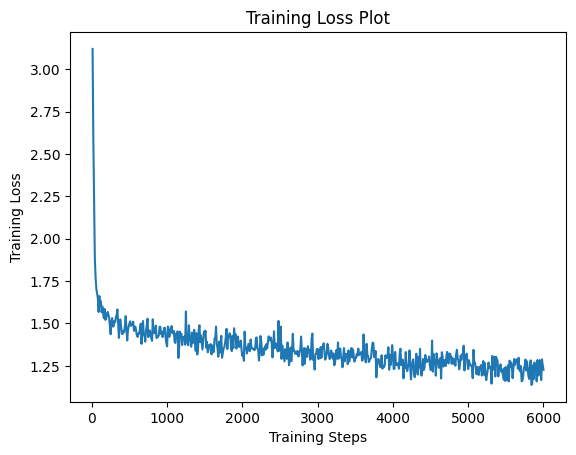

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

training_logs = trainer.state.log_history

loss = []
step = []
for i, log in enumerate(training_logs):
  if (i + 1) % len(training_logs) == 0:
    break
  else:
    loss.append(log['loss'])
    step.append(log['step'])

# 손실함수 그래프
plt.plot(step, loss)
plt.xlabel("Training Steps")
plt.ylabel("Training Loss")
plt.title("Training Loss Plot")
plt.show()

### Upload the trained model Huggingface

- HuggingFace model-repository에 저장

In [20]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' creden

In [21]:
model.push_to_hub('kyeong6/koalpaca-polyglot-5_8b-food-recys')

adapter_model.safetensors:   0%|          | 0.00/14.7M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/kyeong6/koalpaca-polyglot-5_8b-food-recys/commit/6b59b7fad27efc0a55d4ad89a30cfbd1d503f5b6', commit_message='Upload model', commit_description='', oid='6b59b7fad27efc0a55d4ad89a30cfbd1d503f5b6', pr_url=None, pr_revision=None, pr_num=None)